In [1]:
"""
Recorded temperatures for a cup of water cooling down.
Data logging: k-type thermocouple + Arduino
Cup material: thermos (run 1), glass (run 2)
"""
import numpy as np
import matplotlib.pylab as pl
from scipy.optimize import curve_fit
from scipy.integrate import odeint
%matplotlib inline
pl.rcParams['figure.figsize'] = 12, 8  # that's default image size for this 

In [2]:
def cooling(y, t, r1, r2, r12, Tenv):
    """Thermally coupled systems Newton's cooling equation,
    to be fed to `scipy.integrate.odeint`.
    """
    # Temparatures
    T1, T2 = y
    # Interaction
    dydt = [-r1 * (T1 - Tenv) - r12 * (T1 - T2),
            -r2 * (T2 - Tenv) - r12 * (T2 - T1)]
    return dydt

def coolingfit(t, T10, T20, r1, r12, Tenv):
    """Fitting the cooling equation, variables mapped from curve_fit to odeint.

    T1: temperature of water (measured)
    T2: temperature of container (unknown)

    Input:
    t: time
    T10: initial value of T1
    T20: initial value of T2
    r1: charecteristic constant for T1+environment
    r2: characteristic constant for T2+environment (taken to be the same as r1 here)
    r12: characteristic constant for T1+T2
    Tenv: environment's constant temperature
    """
    vals = odeint(cooling, [T10, T20], t, args=(r1, r1, r12, Tenv))
    # Just return the measured temperature, T1(t)
    return vals[:, 0]

In [3]:
# Thermos cup
filename = 'TC-160511-191747.csv'

data = np.loadtxt(filename, delimiter=',', comments='#')

# Time millis -> minutes
t = data[:,0]/1000/60
# Temperature()
c = data[:,2]

In [4]:
# Fitting!
popt, pcov = curve_fit(coolingfit, t, c, bounds=(0, [100., 100., 10., 10., 40.]))

# Extracting variables
T10, T20, r1, r12, Tenv1 = popt
vals = odeint(cooling, [T10, T20], t, args=(r1, r1, r12, Tenv1))
# water temperature prediction
x = vals[:, 0]
# cup temperature prediction
y = vals[:, 1]

# Print fitting results
perr = np.sqrt(np.diag(pcov))
print("Variable, value, standard deviation")
for val in zip(["T10", "T20", "r1", "r12", "Tenv1"], popt, perr):
    print(val)

Variable, value, standard deviation
('T10', 97.015295208156246, 0.0051792227739825602)
('T20', 79.072542617095465, 0.029751306568695367)
('r1', 0.024921713399266989, 1.8173183746894901e-05)
('r12', 0.080482326936702014, 0.00020048441645998535)
('Tenv1', 35.443165658325697, 0.012563855325610223)


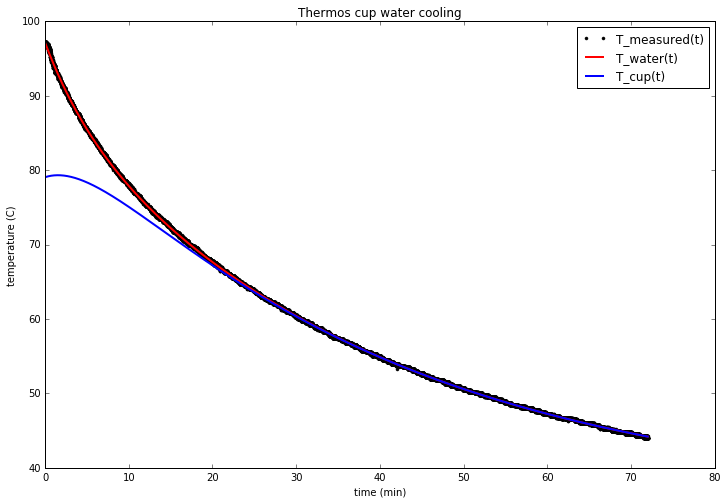

In [5]:
pl.plot(t, c, 'k.', label='T_measured(t)')
pl.plot(t, x, 'r-', label='T_water(t)', linewidth=2)
pl.plot(t, y, 'b-', label='T_cup(t)', linewidth=2)
pl.xlabel('time (min)')
pl.ylabel('temperature (C)')
pl.legend(loc='best')
pl.title('Thermos cup water cooling')

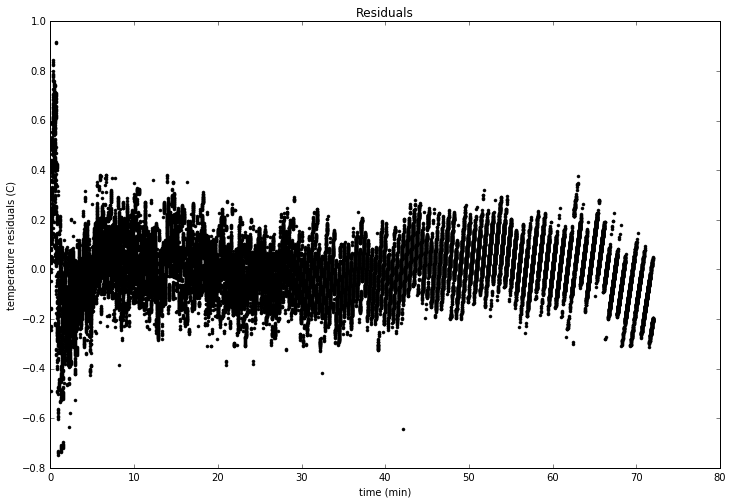

In [6]:
pl.plot(t, c-x, 'k.')
pl.xlabel('time (min)')
pl.ylabel('temperature residuals (C)')
pl.title('Residuals')

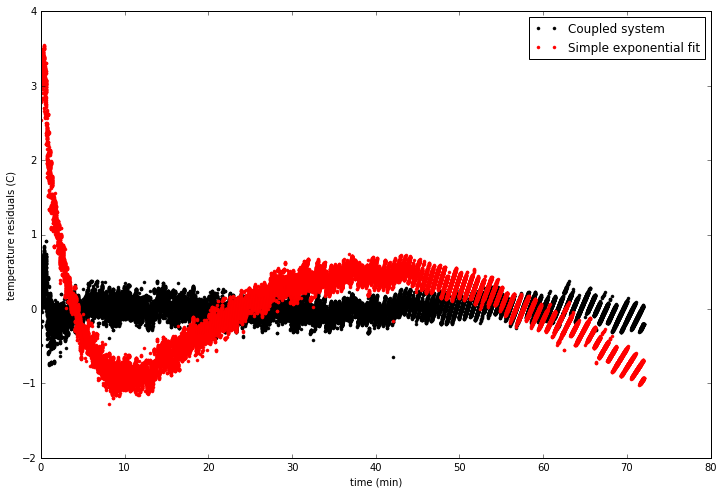

In [7]:
# Compare with simple exponential cooling curve fit
def expo(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(expo, t, c, bounds=(0, [100., 10., 40.]))
xx = expo(t, popt[0], popt[1], popt[2])

pl.plot(t,c-x,'k.', label='Coupled system')
pl.plot(t,c-xx,'r.', label='Simple exponential fit')
pl.xlabel('time (min)')
pl.ylabel('temperature residuals (C)')
pl.legend(loc='best')

Variable, value, standard deviation
('T10', 94.511760541930698, 0.047454959357423172)
('T20', 78.564694797730851, 0.051036759494555287)
('r1', 0.063243423742091409, 0.00011418759842988755)
('r12', 2.4267874344011138, 0.018581900128106236)
('Tenv1', 44.343518796481789, 0.038851703831512173)


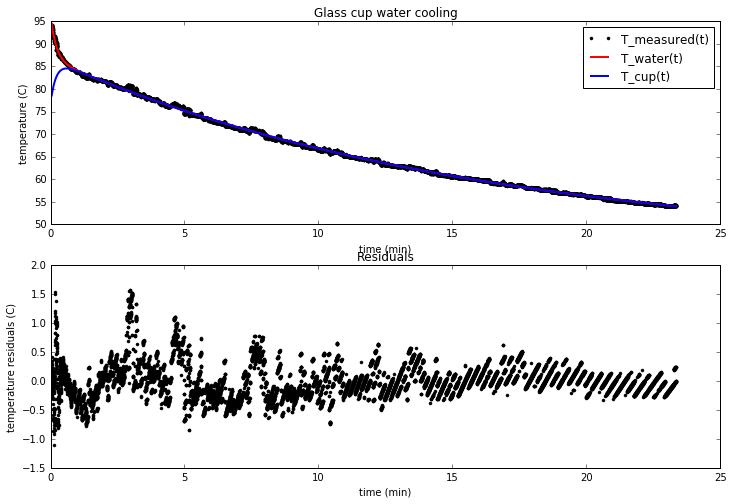

In [8]:
# Glass cup recording
filename = 'TC-160511-203602.csv'

data = np.loadtxt(filename, delimiter=',', comments='#')

# Time millis -> minutes
t = data[:,0]/1000/60
# Temperature()
c = data[:,2]

# Fitting!
popt, pcov = curve_fit(coolingfit, t, c, bounds=(0, [100., 100., 10., 10., 50.]))

# Extracting variables
T10, T20, r1, r12, Tenv1 = popt
vals = odeint(cooling, [T10, T20], t, args=(r1, r1, r12, Tenv1))
# water temperature prediction
x = vals[:, 0]
# cup temperature prediction
y = vals[:, 1]

# Print fitting results
perr = np.sqrt(np.diag(pcov))
print("Variable, value, standard deviation")
for val in zip(["T10", "T20", "r1", "r12", "Tenv1"], popt, perr):
    print(val)

pl.subplot(2,1,1)
pl.plot(t, c, 'k.', label='T_measured(t)')
pl.plot(t, x, 'r-', label='T_water(t)', linewidth=2)
pl.plot(t, y, 'b-', label='T_cup(t)', linewidth=2)
pl.xlabel('time (min)')
pl.ylabel('temperature (C)')
pl.legend(loc='best')
pl.title('Glass cup water cooling')

pl.subplot(2,1,2)
pl.plot(t, c-x, 'k.')
pl.xlabel('time (min)')
pl.ylabel('temperature residuals (C)')
pl.title('Residuals')